# Haberman's Cancer Survival Data

__<p>Relevant Information:</p>__
<ul>
    <li>The dataset contains cases from a study</li>
    <li>that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital</li>
    <li>on the survival of patients who had undergone surgery for breast cancer.</li>
</ul>

__<p>Number of Instances: 305</p>__

__<p>Number of Attributes: 4 (including the class attribute)</p>__

## About the Haberman's cancer Survival Dataset

The `Haberman.csv` dataset contains the following features:

__Attribute Information:__

Feature | Description 
----------|---------------
**`Age of patient at time of operation`** | Numerical Feature   
**`Patient's year of operation`**    | Numerical Feature <br><ul><li>**Year - 1900**</li>
**`Number of positive axillary nodes detected`** | Numerical Feature  
**`Survival status`** | Class Attribute:  <br/><ul><li><code>1 = the patient survived 5 years or longer</code></li><li><code>2 = the patient died within 5 year</code></li>  
**`Missing Attribute Values`** | None

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *

## 1.1 Reading Data

In [2]:
#Loading the Haberman's Dataset as a Dataframe in Pandas
dataset = pd.read_csv('haberman1.csv')

In [3]:
# Q) how many data-points and features?
dataset.shape

(305, 4)

In [4]:
# Q) What are the column names in dataset
print(dataset.columns)
dataset.head(5)

Index(['30', '64', '1', '1.1'], dtype='object')


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


__SUMMARY:<p>1) The Dataset contains numerical values</p><p>2) The column names are missing in the data</p><p>3) Need to add the column names in the dataset which can be found on kaggle's Haberman's Breast Cancer Survival Dataset Page
   https://www.kaggle.com/gilsousa/habermans-survival-data-set/</p>__

In [5]:
#Adding column names to the dataset
#(Q) What are the column names in our dataset?
dataset.columns = ['patient_age','operation_year','nodes_detected','survival_status']
print(dataset.columns)
print('-'*70)
print(dataset.head(5))
print('-'*70)
print(dataset.tail(5))

Index(['patient_age', 'operation_year', 'nodes_detected', 'survival_status'], dtype='object')
----------------------------------------------------------------------
   patient_age  operation_year  nodes_detected  survival_status
0           30              62               3                1
1           30              65               0                1
2           31              59               2                1
3           31              65               4                1
4           33              58              10                1
----------------------------------------------------------------------
     patient_age  operation_year  nodes_detected  survival_status
300           75              62               1                1
301           76              67               0                1
302           77              65               3                1
303           78              65               1                2
304           83              58               2  

<p>1) First column shows age of patient at time of operation (numerical)</p><p>2) Second column shows patient's year of operation (year - 19XX, numerical)</p><p>3) Third column shows number of positive axillary nodes detected (numerical)</p>
<p>4) Fourth column shows survival status of patient</p>
<ul>
    <li>a) 1 = the patient survived 5 years or longer</li>
    <li> b) 2 = the patient died within 5 year</li>
</ul>

## 1.2 Data Analysis

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
patient_age        305 non-null int64
operation_year     305 non-null int64
nodes_detected     305 non-null int64
survival_status    305 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
#Q) Check for any empty values in dataset
dataset.isnull().any() 

patient_age        False
operation_year     False
nodes_detected     False
survival_status    False
dtype: bool

__SUMMARY:<p>1) The dataset has 305 rows and 4 columns or features<p>2) Columns are patient_age, operation_year, nodes_detected, survival_status<p>3) There are no missing values in any column and all values are numerical (integers)__

1    224
2     81
Name: survival_status, dtype: int64
--------------------------------------------------------


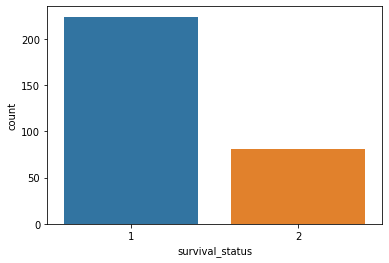

In [8]:
#Q) Out of 305 patients diagnosed How many patients survived longer than 5 years and how many died within 5 years 
#Q) How many patients survived longer than 5 years 
#Q) How many patients died within 5 years
print(dataset['survival_status'].value_counts())
print('-'*56)
sns.countplot(dataset['survival_status'])
plt.show()

Number of patients who survived more than 5 years  224 , ( 73.44262295081967 %)
Number of patients who died within 5 years 81 , ( 26.557377049180324 %)
--------------------------------------------------------------------------------


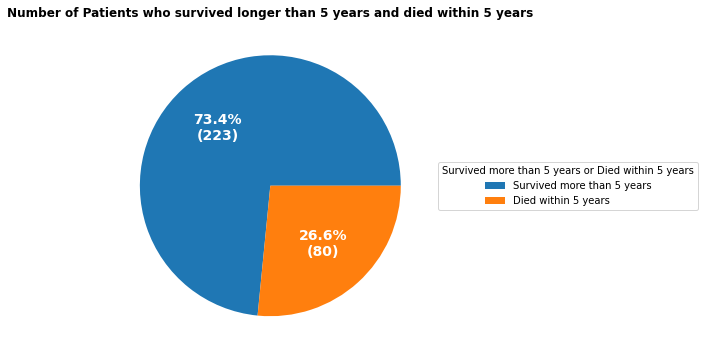

In [9]:
#Q) Out of 305 patients diagnosed How many Percentage of patients survived longer than 5 years and how many died within 5 years 
#Q) How many Percentage of patients survived longer than 5 years 
#Q) How many Percentage of patients died within 5 years
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

#dataset['survival_status'].value_counts(normalize=True)*100

y_value_counts = dataset['survival_status'].value_counts()
print("Number of patients who survived more than 5 years ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")
print("Number of patients who died within 5 years", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[1]+y_value_counts[2]))*100,"%)")

print('-'*80)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Survived more than 5 years", "Died within 5 years"]

data = [y_value_counts[1], y_value_counts[2]]
ingredients = [x for x in recipe]


def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title = "Survived more than 5 years or Died within 5 years",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=14, weight="bold")

ax.set_title("Number of Patients who survived longer than 5 years and died within 5 years", weight='bold')

plt.show()


__SUMMARY:<p>1) The Haberman's Survival Dataset is an imbalanced dataset as there are unequal number of patients in both categories</p><p>2) We can see that out of 305 patients 224 patients or 73.52% patients survived longer than 5 years and 81 patients or 26.47% died within 5 years</p>__

In [10]:
# Descriptive Statistics of the dataset (Mean, Standard deviation, minimum value, maximum value, IQR )
dataset.describe()

,patient_age,operation_year,nodes_detected,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


__SUMMARY: <p>1) The age of the patients range fron 30 to 83<p>2) The operation record of patients range fron the year 1958 to 1969<p>3) The maximum number of nodes detected are 52<p>4) Around 25% patients have no nodes detected<p>5) Around 75% patients have less than 5 nodes detected__

In [11]:
# Median
print('Median')
print('-'*24)
print(dataset.median())

Median
------------------------
patient_age        52.0
operation_year     63.0
nodes_detected      1.0
survival_status     1.0
dtype: float64


In [12]:
# Median Absolute Deviation
print('MAD')
print('-'*28)
print(dataset.mad())

MAD
----------------------------
patient_age        8.821822
operation_year     2.792690
nodes_detected     4.801698
survival_status    0.390089
dtype: float64


In [13]:
#Dividing the dataset into two parts based on survival status
dataset_survived=dataset[dataset['survival_status']==1]#Patients survived longer than 5 years
dataset_died=dataset[dataset['survival_status']==2]#patients died within 5 years

In [14]:
dataset_survived.describe()

,patient_age,operation_year,nodes_detected,survival_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [15]:
dataset_died.describe()

,patient_age,operation_year,nodes_detected,survival_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [16]:
# Median
print('Median')
print('-'*24)
print(dataset_survived.median())
print('-'*24)
print(dataset_died.median())

Median
------------------------
patient_age        52.0
operation_year     63.0
nodes_detected      0.0
survival_status     1.0
dtype: float64
------------------------
patient_age        53.0
operation_year     63.0
nodes_detected      4.0
survival_status     2.0
dtype: float64


In [17]:
# Median Absolute Deviation
print('MAD')
print('-'*28)
print(dataset_survived.mad())
print('-'*28)
print(dataset_died.mad())

MAD
----------------------------
patient_age        9.075574
operation_year     2.776786
nodes_detected     3.545121
survival_status    0.000000
dtype: float64
----------------------------
patient_age        8.137174
operation_year     2.838287
nodes_detected     6.846822
survival_status    0.000000
dtype: float64


__SUMMARY: <p>1) We can say that patients who died within 5 years have more number of nodes detected</p><p>2) The patients who survived more than 5 years have 0 average nodes detected whereas the patients who died within 5 years have 4 average nodes detected</p><p>3) Around 50% patients who survived more than 5 years have 0 nodes detected and around 25% patients have more than 3 nodes detected</p><p>4) Around 75% patients who died within 5 years have minimum 11 nodes detected</p>__

## 1.2.1 Univariate Analysis

### 1-D Scatter Plot

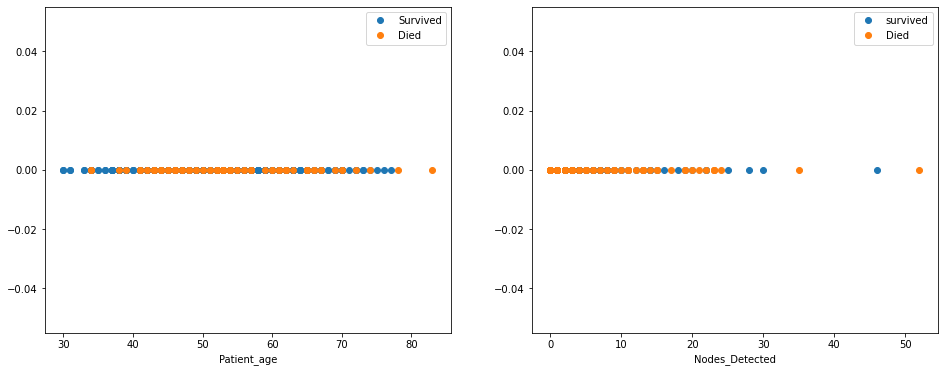

In [18]:
plt.figure(figsize=(16,6))

subplot(1,2,1)
plt.plot(dataset_survived["patient_age"], np.zeros_like(dataset_survived["patient_age"]), 'o', label = 'Survived')
plt.plot(dataset_died["patient_age"], np.zeros_like(dataset_died["patient_age"]), 'o', label = 'Died')
plt.xlabel('Patient_age')
plt.legend()

subplot(1,2,2)
plt.plot(dataset_survived["nodes_detected"], np.zeros_like(dataset_survived['nodes_detected']), 'o', label = 'survived')
plt.plot(dataset_died["nodes_detected"], np.zeros_like(dataset_died["nodes_detected"]), 'o', label = 'Died')
plt.xlabel('Nodes_Detected')
plt.legend()
plt.show()

__SUMMARY:<p>The plots are highly overlapping so we can't draw any proper conclusion</p>__

### Histogram, PDF, CDF

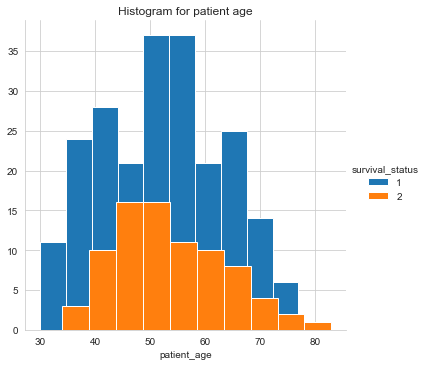

In [43]:
#Histogram, PDF
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(plt.hist, "patient_age") \
   .add_legend();
plt.title('Histogram for patient age')
plt.show();

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


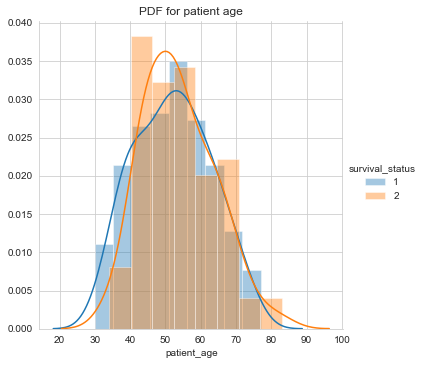

In [44]:
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(sns.distplot, "patient_age") \
   .add_legend();
plt.title('PDF for patient age')
plt.show();

__SUMMARY:<p>1) The PDF plots are highly overlapping but we can see that most of the nodes were detected for the patients in the age group of 40-70<p>2) patients in the age group of below 40 are most likely to survive more than 5 years<p>3) patients in the age group of 40 - 60 are most likely to die within 5 years__

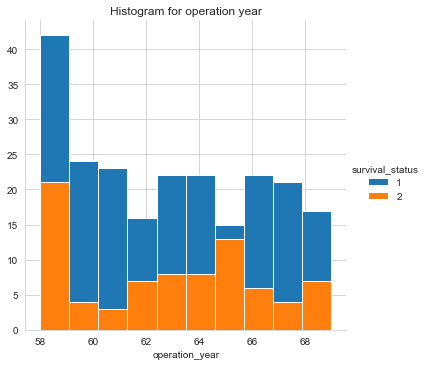

In [45]:
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(plt.hist, "operation_year") \
   .add_legend();
plt.title('Histogram for operation year')
plt.show();

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


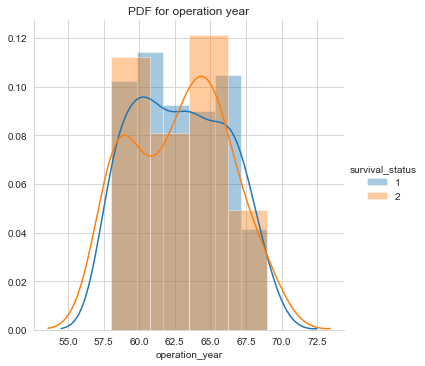

In [46]:
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend();
plt.title('PDF for operation year')
plt.show();

__SUMMARY:<p>1) The PDF plots are highly overlapping but we can say that highest number of cancer operations took place in 1958-60<p>2) Large Number of patients died in year 1960-66__

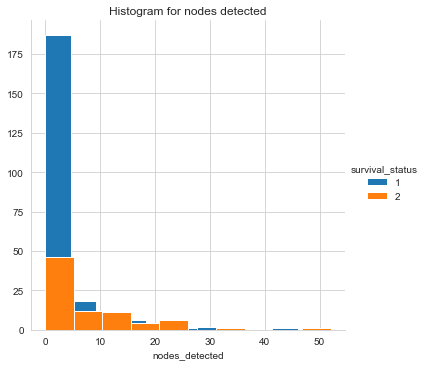

In [47]:
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(plt.hist, "nodes_detected") \
   .add_legend();
plt.title('Histogram for nodes detected')
plt.show();

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


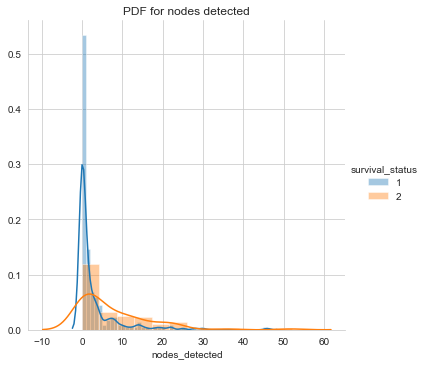

In [48]:
sns.FacetGrid(dataset, hue="survival_status", height=5) \
   .map(sns.distplot, "nodes_detected") \
   .add_legend();
plt.title('PDF for nodes detected')
plt.show();

__SUMMARY:<p>1) Around 187 patients have survived who have less than 5 nodes detected<p>2) The nodes are very important feature to predict the survival of patients as all other plots are highly overlapping<p>3) We can see from the Histogram that lesser the number of nodes detected more are the chances of the patient surviving for more than 5 years<p>4) The pdf looks like a power law distribution so we can say that around 80% patients who survived have positive nodes less than 5__

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


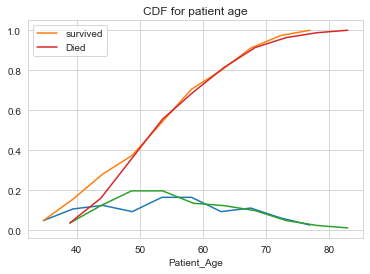

In [49]:
counts1, bin_edges1 = np.histogram(dataset_survived['patient_age'],bins=10,density = True)
pdf1= counts1/(sum(counts1))
print(pdf1);
print(bin_edges1);
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1, label = 'survived')

counts2, bin_edges2 = np.histogram(dataset_died['patient_age'],bins=10,density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2, label = 'Died')
plt.xlabel('Patient_Age')
plt.title('CDF for patient age')
plt.legend()
plt.show()

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


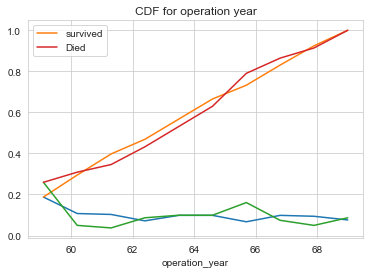

In [50]:
counts1, bin_edges1 = np.histogram(dataset_survived['operation_year'],bins=10,density = True)
pdf1= counts1/(sum(counts1))
print(pdf1);
print(bin_edges1);
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1, label = 'survived')

counts2, bin_edges2 = np.histogram(dataset_died['operation_year'],bins=10,density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2, label = 'Died')
plt.xlabel('operation_year')
plt.title('CDF for operation year')
plt.legend()
plt.show()

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


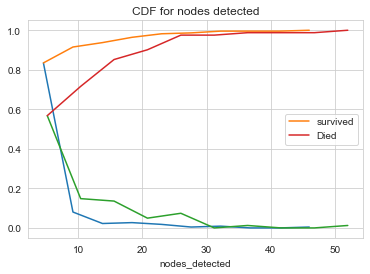

In [51]:
counts1, bin_edges1 = np.histogram(dataset_survived['nodes_detected'],bins=10,density = True)
pdf1= counts1/(sum(counts1))
print(pdf1);
print(bin_edges1);
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1, label = 'survived')

counts2, bin_edges2 = np.histogram(dataset_died['nodes_detected'],bins=10,density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2);
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:],pdf2)
plt.plot(bin_edges2[1:],cdf2, label = 'Died')
plt.xlabel('nodes_detected')
plt.title('CDF for nodes detected')
plt.legend()
plt.show()

__SUMMARY:<P>Around 84% patients who survived have positive nodes less than 5__

### Box Plots

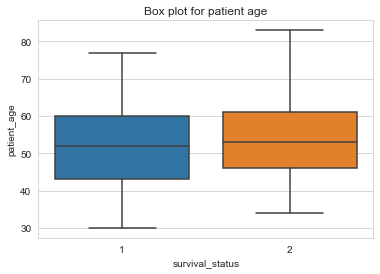

In [52]:
sns.boxplot(x='survival_status',y='patient_age', data=dataset)
plt.title('Box plot for patient age')
plt.show()


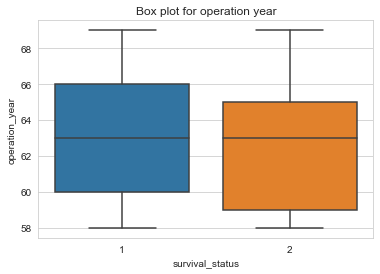

In [53]:
sns.boxplot(x='survival_status',y='operation_year', data=dataset)
plt.title('Box plot for operation year')
plt.show()

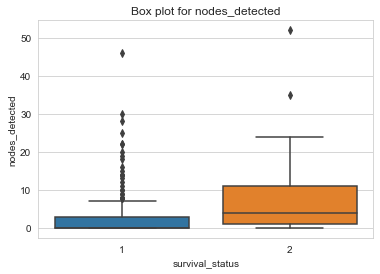

In [54]:
sns.boxplot(x='survival_status',y='nodes_detected', data=dataset)
plt.title('Box plot for nodes_detected')
plt.show()

__SUMMARY:<p>1) We can see that the more the number of positive nodes detected, most likely the patients died<p>2) The more the age of the patients less are the chances of survival__

### Violin Plots

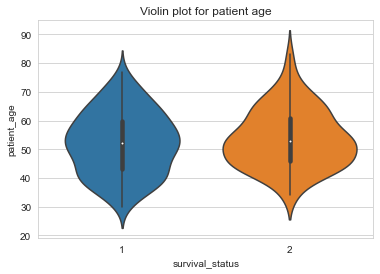

In [56]:
sns.violinplot(x='survival_status',y='patient_age', data=dataset, size=8)
plt.title('Violin plot for patient age')
plt.show()

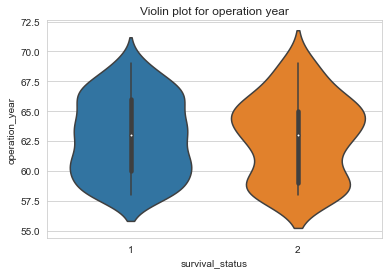

In [57]:
sns.violinplot(x='survival_status',y='operation_year', data=dataset, size=8)
plt.title('Violin plot for operation year')
plt.show()

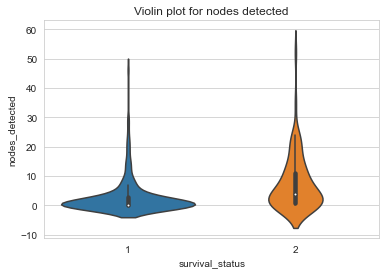

In [58]:
sns.violinplot(x='survival_status',y='nodes_detected', data=dataset, size=8)
plt.title('Violin plot for nodes detected')
plt.show()

__SUMMARY:<p>1) Most of the patients who survived have 0 nodes detected<p>2) Patients who died had more nodes detected and as the number of nodes detected increases more likely are the patients to die__

## 1.2.2 Bivariate Analysis

### 2-D Scatter Plots

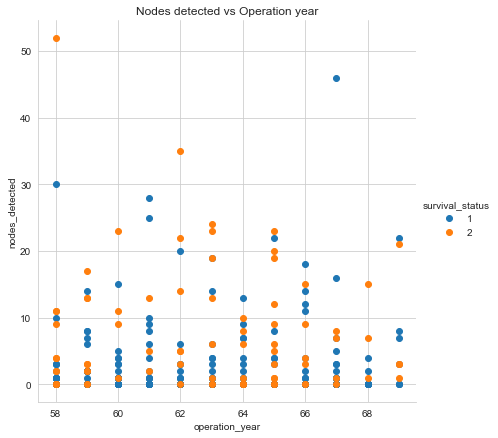

In [59]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='survival_status', height=6)\
.map(plt.scatter, 'operation_year', 'nodes_detected')\
.add_legend()
plt.title('Nodes detected vs Operation year')
plt.show()

__SUMMARY:<p>1) Here we can see that irrespective of the operation year if the patients have 0 or atleast less than 5 nodes detected then there is a high chance of their survival<p>2) Large number of operations were unsuccessful in the year of 1965__

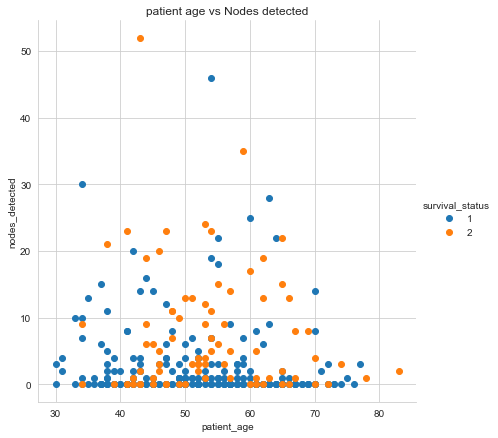

In [61]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='survival_status', height=6)\
.map(plt.scatter, 'patient_age', 'nodes_detected')\
.add_legend()
plt.title('patient age vs Nodes detected')
plt.show()

__SUMMARY:<p>1) Here we can see that irrespective of the patients age if the patients have 0 or atleast less than 5 nodes detected then there is a high chance of their survival<p>2) chances of more than 30 nodes being detected in any patient is less likely__

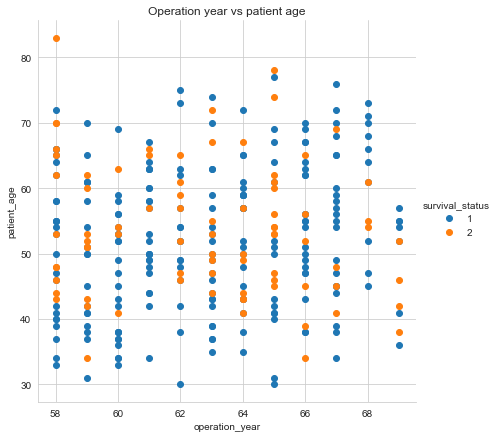

In [60]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue='survival_status', height=6)\
.map(plt.scatter, 'operation_year', 'patient_age')\
.add_legend()
plt.title('Operation year vs patient age')
plt.show()

__SUMMARY:<p>1) Most of the patients operated are in the age group of 40-70__

### Pair Plots

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depr

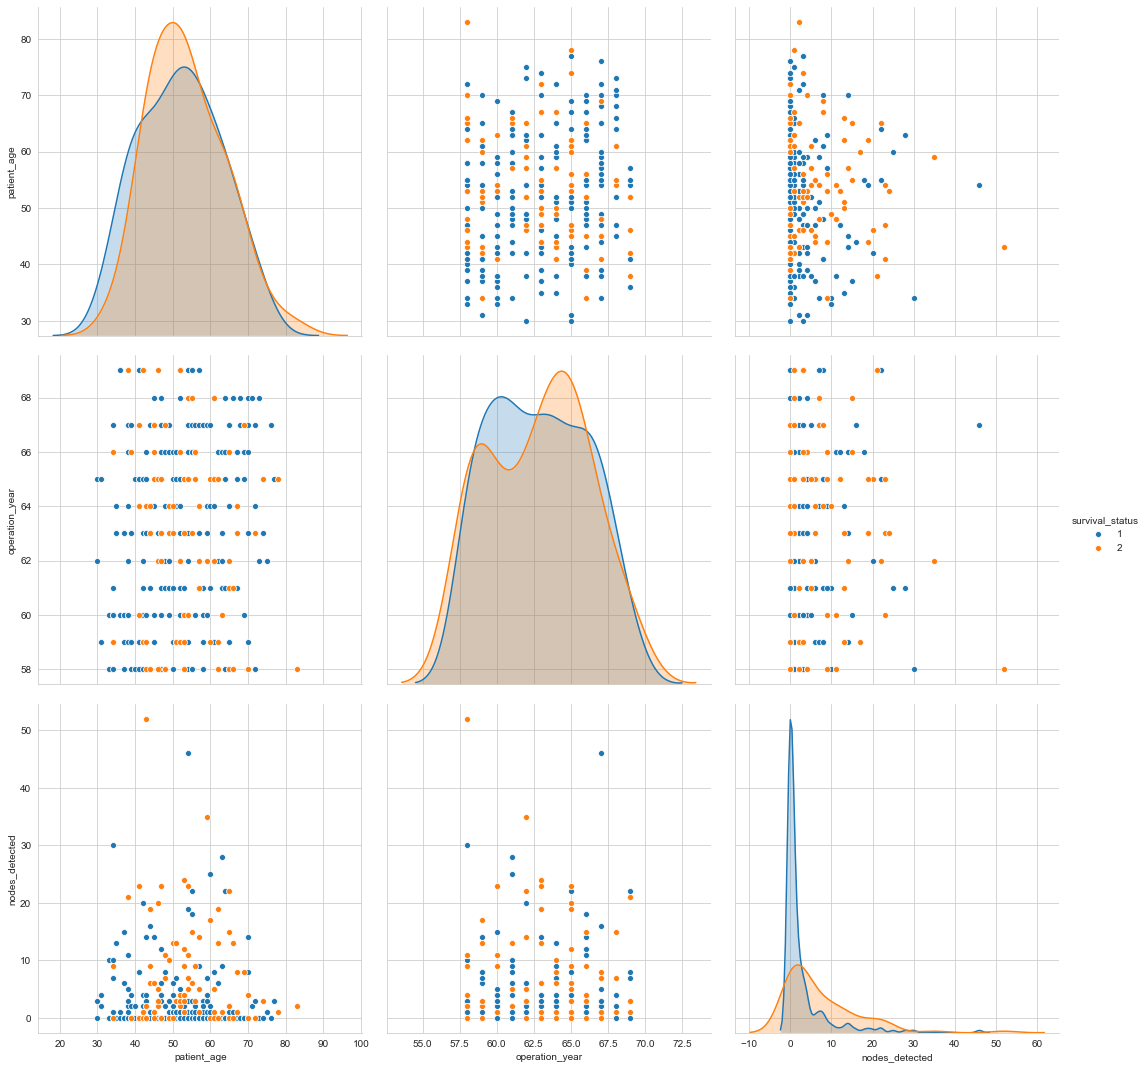

In [37]:
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="survival_status", \
             vars=['patient_age','operation_year','nodes_detected' ], height=5)
plt.show()

__SUMMARY:<p>The plot of nodes detected vs operation year is comparatively better at seperating two classes__

## 1.2.3 Multivariate Analysis

### Contour Plots

In [69]:
%matplotlib inline

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


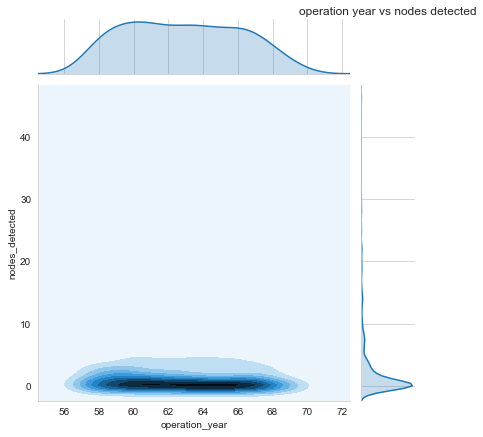

In [74]:
sns.jointplot(x="operation_year", y="nodes_detected", data=dataset_survived, kind="kde");
plt.title('operation year vs nodes detected', pad=70)
plt.show();

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


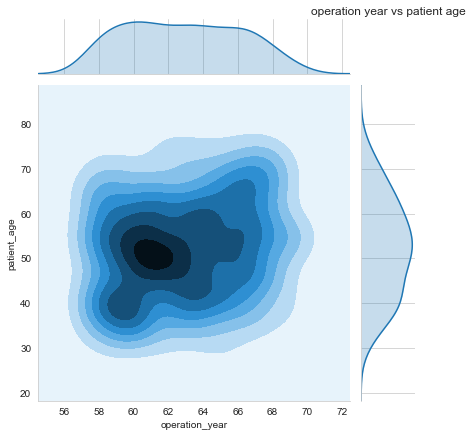

In [75]:
sns.jointplot(x="operation_year", y="patient_age", data=dataset_survived, kind="kde");
plt.title('operation year vs patient age',pad=70)
plt.show();

C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\kpart\Anaconda3\envs\AAI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


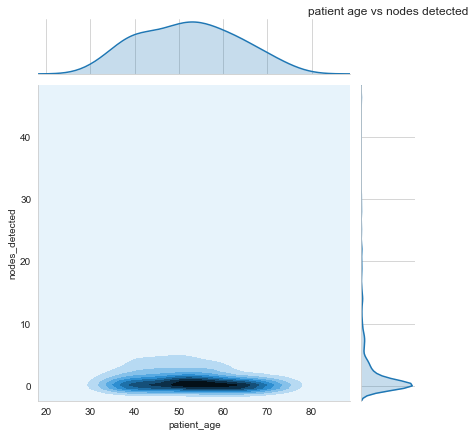

In [76]:
sns.jointplot(x="patient_age", y="nodes_detected", data=dataset_survived, kind="kde");
plt.title('patient age vs nodes detected', pad=70)
plt.show();

## Conclusion:

__<p>1) The number of positive cancer nodes detected in a patient is the most important feature to determine whether a patient will survive or not <p>2) The age of the patient is also somewhat important feature to detemine the patients survival<p>3) A large number of cancer opearations were conducted in year 1960 - 66<p>4) Irrespective of the patients age or operation year if the nodes detected are 0 or atleast less than 5 then there is a high chance of the patients survival <p>5) It is very much less likely to find patients having more than 30 nodes  <p>6) The majority patients operated most likely fall in the age group of 40-70 <p>7) The older patients with more number of nodes detected are more likely to die <p>8) Patients in the age group of 40-60 with more number of nodes detected are most likely to die <p>9) Patients below age of 40 are more likely to survive__